In [62]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

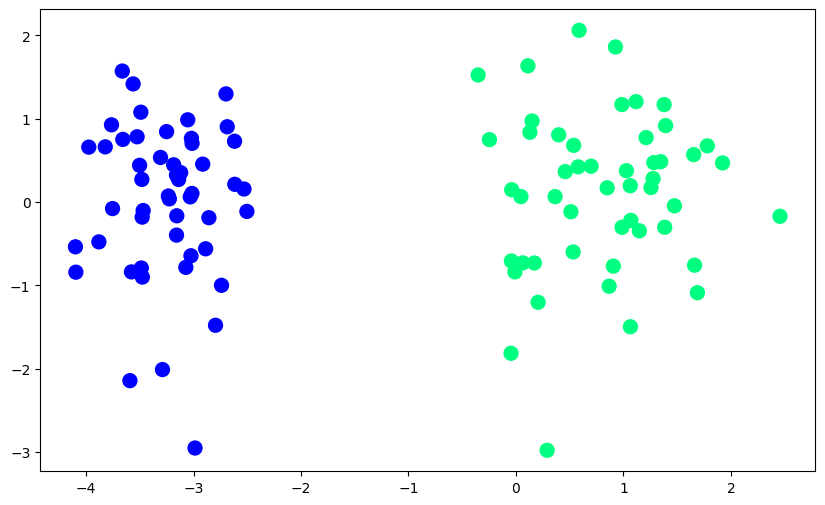

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

## Using Logistic Regression :

In [65]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X, y)

LogisticRegression(penalty=None, solver='sag')

In [66]:
print(lor.coef_)
print(lor.intercept_)

[[4.89156123 0.23795007]]
[5.85394273]


In [67]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [68]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

## Using Gradient Descent :

In [69]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [70]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(2500):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [71]:
coef_,intercept_ = gd(X,y)
print("Coefficient :",coef_)   # A , B
print("Intercept :",intercept_)  # C

Coefficient : [4.36410145 0.17189254]
Intercept : 5.148029492159727


In [72]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [73]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

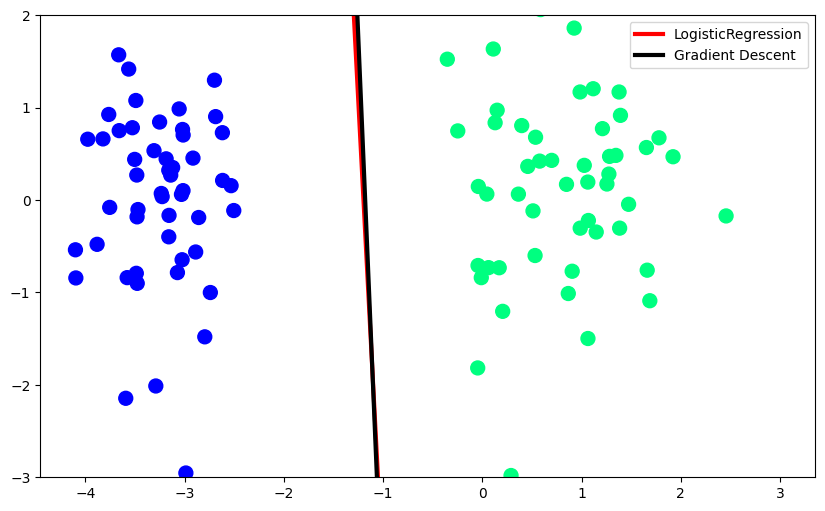

In [74]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='LogisticRegression')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='Gradient Descent')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()